In [26]:
%matplotlib inline

In [27]:
from skimage.io import imread, imshow, imsave

In [28]:
import numpy as np
from numpy import dstack
from skimage import img_as_float

In [29]:
image = imread('references/tiger-color.png')

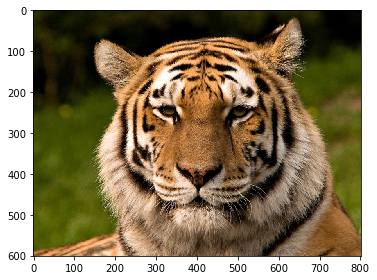

In [30]:
imshow(image)

In [31]:
image_f = img_as_float(image)

In [32]:
r = image_f[:, :, 0]
g = image_f[:, :, 1]
b = image_f[:, :, 2]

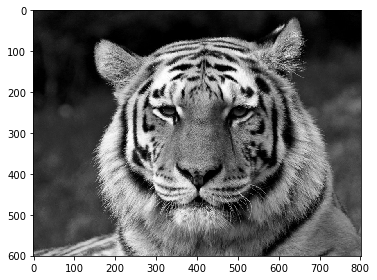

In [33]:
img = b*0.3 + r*0.59 + g*0.11
imshow(img)

In [34]:
image.shape

(601, 801, 3)

In [35]:
gray_bofore = imread('references/gray_world_before.png')

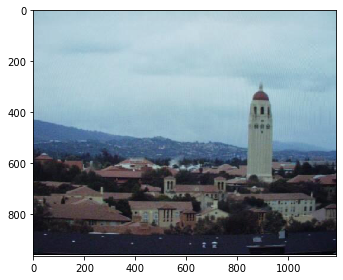

In [36]:
imshow(gray_bofore)

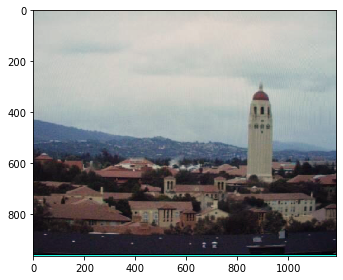

In [37]:
width = gray_bofore.shape[1]
height = gray_bofore.shape[0]
n = width*height
r = np.sum(gray_bofore[:, :, 0]) // n
g = np.sum(gray_bofore[:, :, 1]) // n
b = np.sum(gray_bofore[:, :, 2]) // n
avg = (r + g + b) // 3
gray_world_image = gray_bofore.copy()
gray_world_image[:, :, 0] = gray_bofore[:, :, 0] * (avg / r)
gray_world_image[:, :, 1] = gray_bofore[:, :, 1] * (avg / g)
gray_world_image[:, :, 2] = gray_bofore[:, :, 2] * (avg / b)
imshow(gray_world_image)

In [38]:
ref_color_image_before = imread('references/ref_color_before.png')

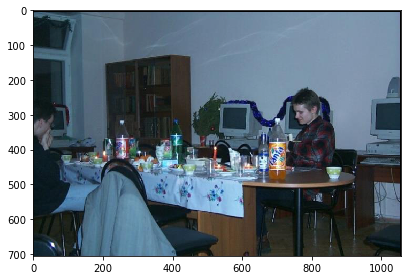

In [39]:
imshow(ref_color_image_before)

In [40]:
color = imread('references/color.png')

In [41]:
colorr = color[10,10]

In [42]:
color2 = imread('references/color2.png')

In [43]:
colorr2 = color2[10,10]

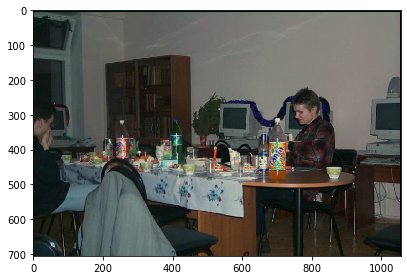

In [44]:
dst = colorr 
src = colorr2

ref_color_image = ref_color_image_before.copy()
ref_color_image[:, :, 0] = ref_color_image_before[:, :, 0] * (dst[0] / src[0])
ref_color_image[:, :, 1] = ref_color_image_before[:, :, 1] * (dst[1] / src[1])
ref_color_image[:, :, 2] = ref_color_image_before[:, :, 2] * (dst[2] / src[2])
imshow(ref_color_image)

/Users/bagrat/opt/anaconda3/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


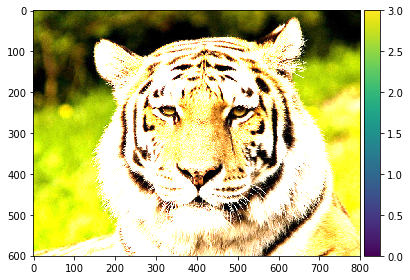

In [45]:

image_ff = img_as_float(image)
func_image = image_ff*3
imshow(func_image)

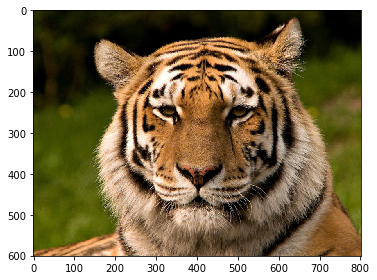

In [46]:
imshow(image_ff)

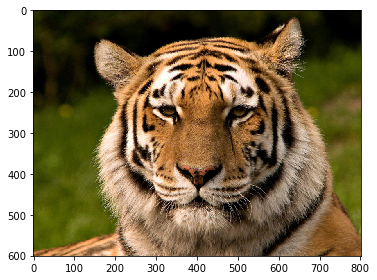

In [47]:
imgg = np.clip(func_image / 3, 0,1)
imshow(imgg)

In [48]:
np.all(imgg == image_ff)

False

In [49]:
image5 = imread('references/norm_ekv_image.png')

In [50]:
image_f = img_as_float(image5)

In [51]:
r = image_f[:, :, 0]
g = image_f[:, :, 1]
b = image_f[:, :, 2]

img = b*0.3 + r*0.59 + g*0.11

[[0.2        0.18823529 0.18823529 ... 1.         1.         1.        ]
 [0.18823529 0.2        0.20392157 ... 1.         1.         1.        ]
 [0.18823529 0.20392157 0.21176471 ... 1.         1.         1.        ]
 ...
 [0.3372549  0.34117647 0.34509804 ... 1.         1.         1.        ]
 [0.32941176 0.34901961 0.35294118 ... 1.         1.         1.        ]
 [0.31764706 0.31764706 0.31764706 ... 1.         1.         1.        ]]


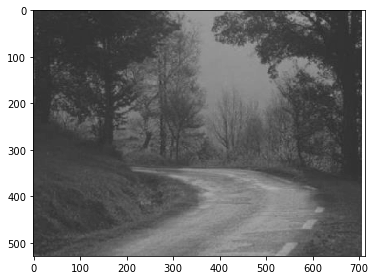

In [52]:
imshow(img)
print(img)

In [53]:
normalized_image = img.copy()
Imax = np.max(normalized_image)
Imin = np.min(normalized_image)
Omin, Omax = 0, 255
a = float(Omax - Omin) / (Imax - Imin)
b = Omin - a * Imin
normalized_image = a * normalized_image + b
normalized_image = normalized_image.astype(np.uint8)

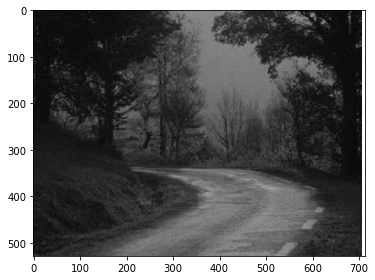

In [54]:
imshow(normalized_image)

In [55]:
img.shape

(528, 712)

In [56]:
import matplotlib.pyplot as plt

In [57]:
import PIL
from PIL import Image
import numpy as np

In [58]:
imgg5 = Image.open('references/norm_ekv_image.png')
imgg5 = np.array(imgg5, dtype=np.int32)
r = imgg5[:, :, 0]
g = imgg5[:, :, 1]
b = imgg5[:, :, 2]

img = (r+g+b)//3


In [59]:
img[10][10]

53

In [60]:
equalized_image = img.copy()
k = 255
width = equalized_image.shape[1]
height = equalized_image.shape[0]
hist,_ = np.histogram(img.flatten(), bins=256, range=(0,256))
print(hist)
hist = hist/width/height
for i in range(1, k):
    hist[i] = hist[i - 1] + hist[i]
for i in range(0, height):
    for j in range(0, width):
        equalized_image[i][j] = k * hist[equalized_image[i][j]]

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     2     1     4     5    12    17    50   128
   611  1114  3555  8263 11960  8604  6910  7391  7443  6294  6653  6782
  7253  5767  6014  8059  8359  6135  6270  6137  8431  4667  6154  7179
  3606  4490  4853  4729  4508  4533  6027  5625  4437  4198  4211  3981
  3717  3760  4248  3987  3276  3200  3076  2861  2689  2617  3048  2622
  3587  1797  1875  1819  1799  1863  1780  1515  1467  1537  1494  1395
  1474  1723  1757  1342  1293  1328  2402  1056  1253  1433  1340  1268
  1421  1469  1363  1526  2124  2300  1702  1665  1803  3277  1327  1963
  2258  2010  2079  2358  2405  2211  2552  3290  3161  2809  2715  6664
  1410  2966  3468  2706  2753  2241  1877  1670  1286  1227  1436   970
   400   606   261   207   149   161    96    50   

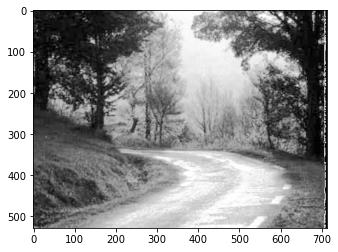

In [61]:
plt.imshow(equalized_image, cmap='gray')